# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
 - URL dataset: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

### pada tahapan ini terdapat berbagai library yang dibutuhkan untuk mendukung identifikasi dataset dan pembuatan klasifikasi model

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

### Tahapan ini terdapat memuat sebuah dataset klasifikasi yaitu dataset kinerja dari siswa dan menampilkan beberapa isian dari data

In [5]:
# load data
data = pd.read_csv('../Student_performance_data.csv')

In [7]:
# menampilkan data
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### - Pada tahapan ini terdapat identifikasi data untuk mengetahui jumlah baris dan kolom, mengetahui ada atau tidaknya missing value, identifikasi kolom numerik dan menunjukkan korelasi antar atribut
### - Melakukan plot untuk mengetahui distribusi dari variabel target, dan plot distribusi untuk hubungan antara beberapa variabel

In [8]:
# identifikasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [9]:
# indentifikasi jumlah baris dan kolom
print(f"Jumlah baris: {data.shape[0]}, Jumlah kolom: {data.shape[1]}")

Jumlah baris: 2392, Jumlah kolom: 15


In [10]:
# identifikasi missing value data
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

print(f"jumlah data yang hilang: ", missing_values)

jumlah data yang hilang:  StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [11]:
# analisis kolom dataset
data.describe(include="all")

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


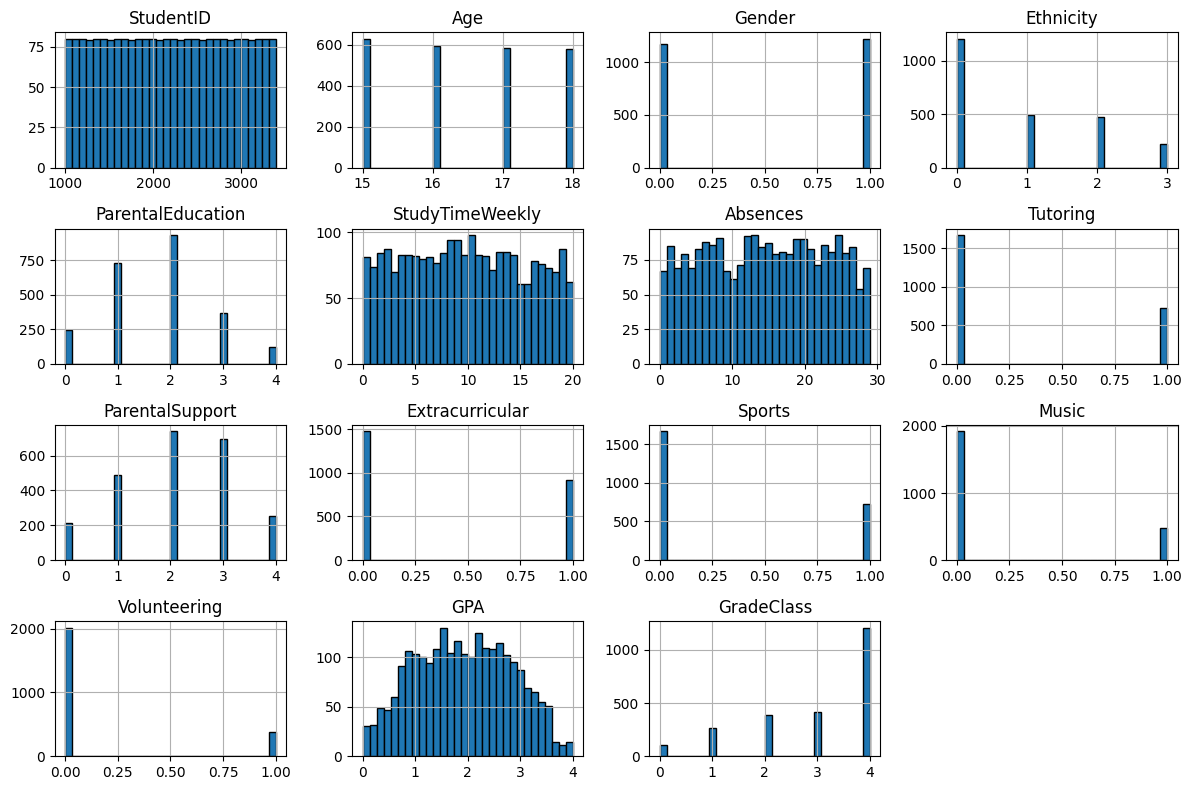

In [12]:
# identifikasi kolom numerik
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns
data[kolom_numerik].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

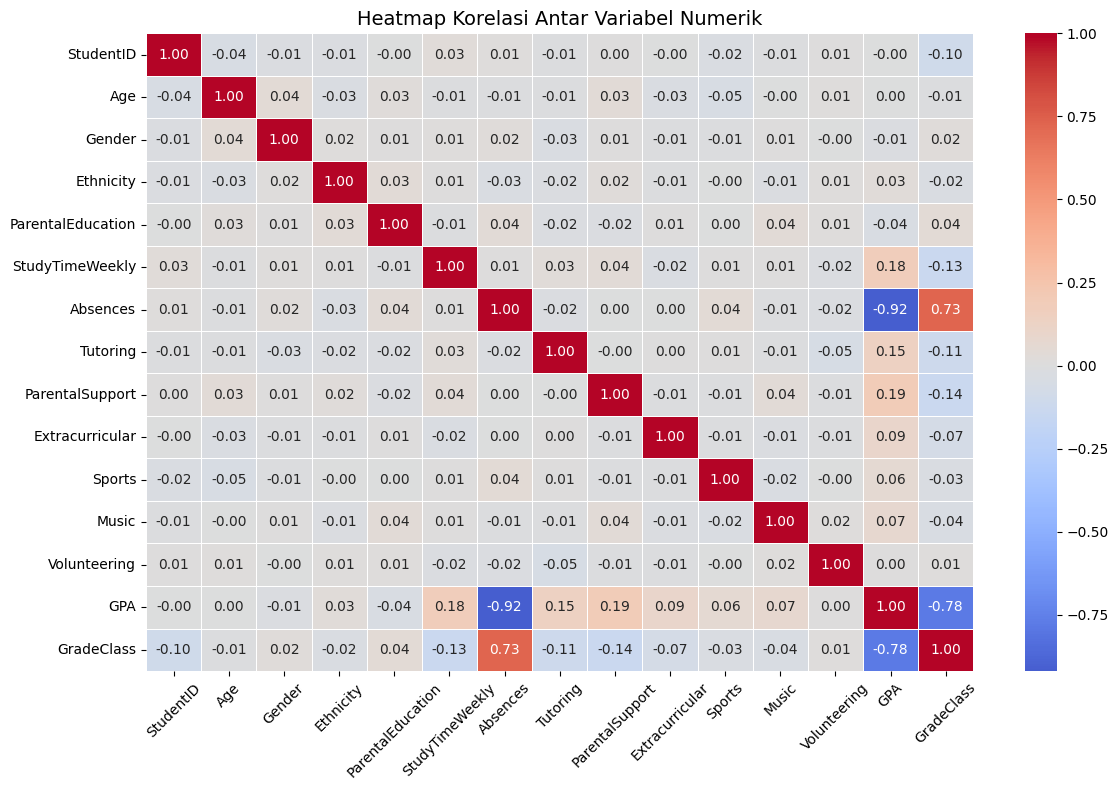

In [13]:
# Hitung korelasi antar fitur numerik
matriks_korelasi = data.corr(numeric_only=True)

# Buat plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriks_korelasi, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\VOKASI-UA\AppData\Local\Temp\ipykernel_12972\2613197503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='GradeClass', palette='Set2')


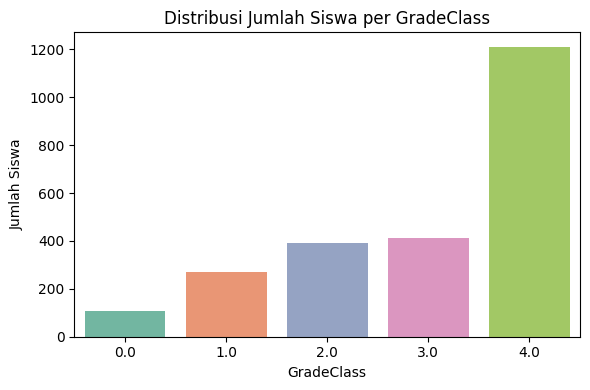

In [14]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='GradeClass', palette='Set2')
plt.title("Distribusi Jumlah Siswa per GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Jumlah Siswa")
plt.tight_layout()
plt.show()

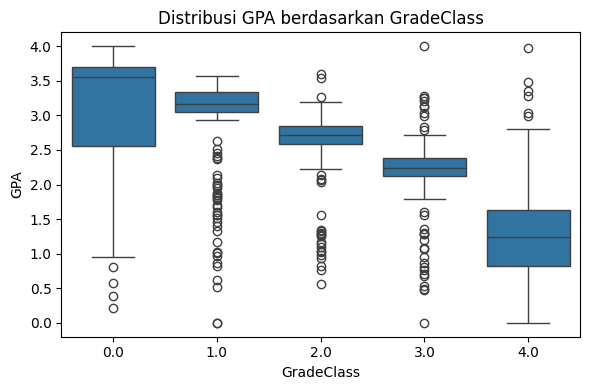

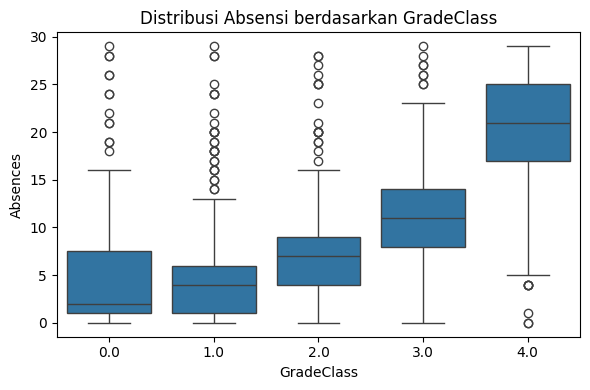

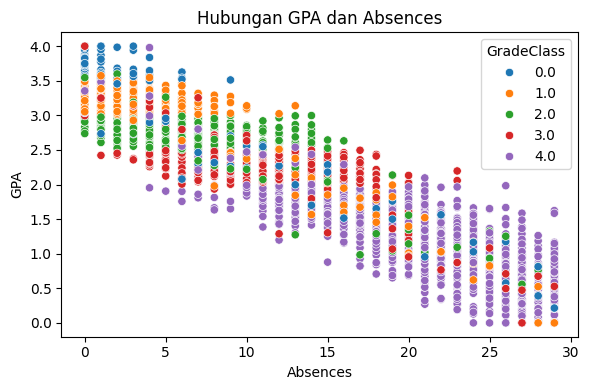

In [15]:
# Boxplot GPA berdasarkan GradeClass
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='GradeClass', y='GPA')
plt.title("Distribusi GPA berdasarkan GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("GPA")
plt.tight_layout()
plt.show()

# Boxplot Absences berdasarkan GradeClass
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='GradeClass', y='Absences')
plt.title("Distribusi Absensi berdasarkan GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Absences")
plt.tight_layout()
plt.show()

# Scatter plot GPA vs Absences
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Absences', y='GPA', hue='GradeClass', palette='tab10')
plt.title("Hubungan GPA dan Absences")
plt.xlabel("Absences")
plt.ylabel("GPA")
plt.tight_layout()
plt.show()

# Insight

- Terdapat hubungan relasi positif pada atribut Gradeclass dan Absences yaitu 0.73. - dan terdapat relasi negatif yaitu gradeclass dan GPA yaitu -.78 pada atribut GPA dan Absences yaitu -92
- Persebaran distribusi gradeclass paling banyak yaitu 4 sekitar 1200 lebih siswa, selain itu grade 0-3 relatif rendah diangka 0-400 siswa
- GradeClass 0 dan 1 memiliki nilai GPA yang lebih tinggi dan stabil, dengan median mendekati atau di atas 3.0.
- GradeClass 4 memiliki distribusi GPA paling rendah — banyak siswa dengan GPA < 2, dan beberapa di bawah 1.
- Semakin tinggi GradeClass (angka lebih besar), semakin rendah GPA siswa — sesuai harapan bahwa GradeClass 4 menunjukkan performa lebih buruk.
- GradeClass 0 dan 1 memiliki absensi lebih sedikit (median sekitar 5).
- GradeClass 4 memiliki median absensi tertinggi (~20), dan banyak outliers absensi tinggi.



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Pada tahapan ini terdapat cek data untuk ada atau tidaknya nilai kosong dan nilai duplikat. dan melakukan normalisasi pada dataset

In [16]:
# cek nilai kosong
print("Nilai Kosong: ")
print(data.isnull().sum())

print("\n")

# cek nilai duplikat
print("Nilai Duplikat: ")
print(data.duplicated().sum())

Nilai Kosong: 
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Nilai Duplikat: 
0


In [17]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('GradeClass')

# Terapkan MinMaxScaler hanya ke kolom yang dipilih
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Tampilkan hasil
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0.000000,0.666667,1.0,0.000000,0.50,0.992773,0.241379,1.0,0.50,0.0,0.0,1.0,0.0,0.732299,2.0
1,0.000418,1.000000,0.0,0.000000,0.25,0.771270,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.760729,1.0
2,0.000836,0.000000,0.0,0.666667,0.75,0.210718,0.896552,0.0,0.50,0.0,0.0,0.0,0.0,0.028151,4.0
3,0.001255,0.666667,1.0,0.000000,0.75,0.501965,0.482759,0.0,0.75,1.0,0.0,0.0,0.0,0.513555,3.0
4,0.001673,0.666667,1.0,0.000000,0.50,0.233840,0.586207,1.0,0.75,0.0,0.0,0.0,0.0,0.322015,4.0


In [18]:
# Menampilkan data setelah preprocessing
print("\nData Setelah Preprocessing:")
print(data.head())




Data Setelah Preprocessing:
   StudentID       Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0   0.000000  0.666667     1.0   0.000000               0.50         0.992773   
1   0.000418  1.000000     0.0   0.000000               0.25         0.771270   
2   0.000836  0.000000     0.0   0.666667               0.75         0.210718   
3   0.001255  0.666667     1.0   0.000000               0.75         0.501965   
4   0.001673  0.666667     1.0   0.000000               0.50         0.233840   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0  0.241379       1.0             0.50              0.0     0.0    1.0   
1  0.000000       0.0             0.25              0.0     0.0    0.0   
2  0.896552       0.0             0.50              0.0     0.0    0.0   
3  0.482759       0.0             0.75              1.0     0.0    0.0   
4  0.586207       1.0             0.75              0.0     0.0    0.0   

   Volunteering       GPA  GradeClass  

In [19]:
# Simpan dataset hasil preprocessing
output_path = '../preprocessing/Student_performance_processed_data.csv'
data.to_csv(output_path, index=False)
print(f"\nDataset hasil preprocessing disimpan di: {output_path}")


Dataset hasil preprocessing disimpan di: ../preprocessing/Student_performance_processed_data.csv
